# **AIN 214 - PA3 - FALL 2025**

**Student Number** : 2240765020

**Name Surname**   : Sude Gündüz


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 15.12.2025 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>

# **Data Prepocessing and Regression**

---
**Dataset Path:** "Data/diamonds.csv"
---

We will deal with the diamonds dataset. The Diamonds dataset contains physical measurements and quality grades for approximately 54,000 round-cut diamonds, used to predict diamond prices based on characteristics such as carat weight, cut quality, color grade, clarity, and dimensions.

**Features:**

* Cut: The quality of the diamond's cut, which affects how well it reflects light; Ideal is the best cut quality.
* Color: The diamond's color grade, where D is completely colorless (best) and J has noticeable yellow tint (worst).
* Clarity: The clarity grade measuring internal flaws (inclusions); IF (Internally Flawless) is best, I1 (Included) is worst.
* Carat: The weight of the diamond; 1 carat = 0.2 grams (ranges from 0.2 to 5.01 carats).
* Depth: The total depth percentage, calculated as z / mean(x, y), representing the height from culet to table divided by average diameter (ranges from 43% to 79%).
* Table: The width of the diamond's top facet (table) relative to its widest point (ranges from 43% to 95%).
* x: The length of the diamond in millimeters (ranges from 0 to 10.74 mm).
* y: The width of the diamond in millimeters (ranges from 0 to 58.9 mm).
* z: The depth/height of the diamond in millimeters (ranges from 0 to 31.8 mm).
* Price: The price of the diamond in US dollars, ranging from \$326 to \$18,823.






# **Necessary Imports**

In [92]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **PART- 1: Data Preprocessing (50 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values (if any)
* Visualize the target variable with respect to the features
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [93]:
# implementation here

# reading the dataset to a dataframe
diomands_df = pd.read_csv("Data/diamonds.csv")

# checking for missing values per column
missing_values_per_column=diomands_df.isnull().sum() 
print("Missing values per column")
print(missing_values_per_column[missing_values_per_column>0])
# checking for total missing values
total_missing=missing_values_per_column.sum()
print("Total missing values:", total_missing)

Missing values per column
Series([], dtype: int64)
Total missing values: 0


As we can see from the output there is no missing values in this dataset.

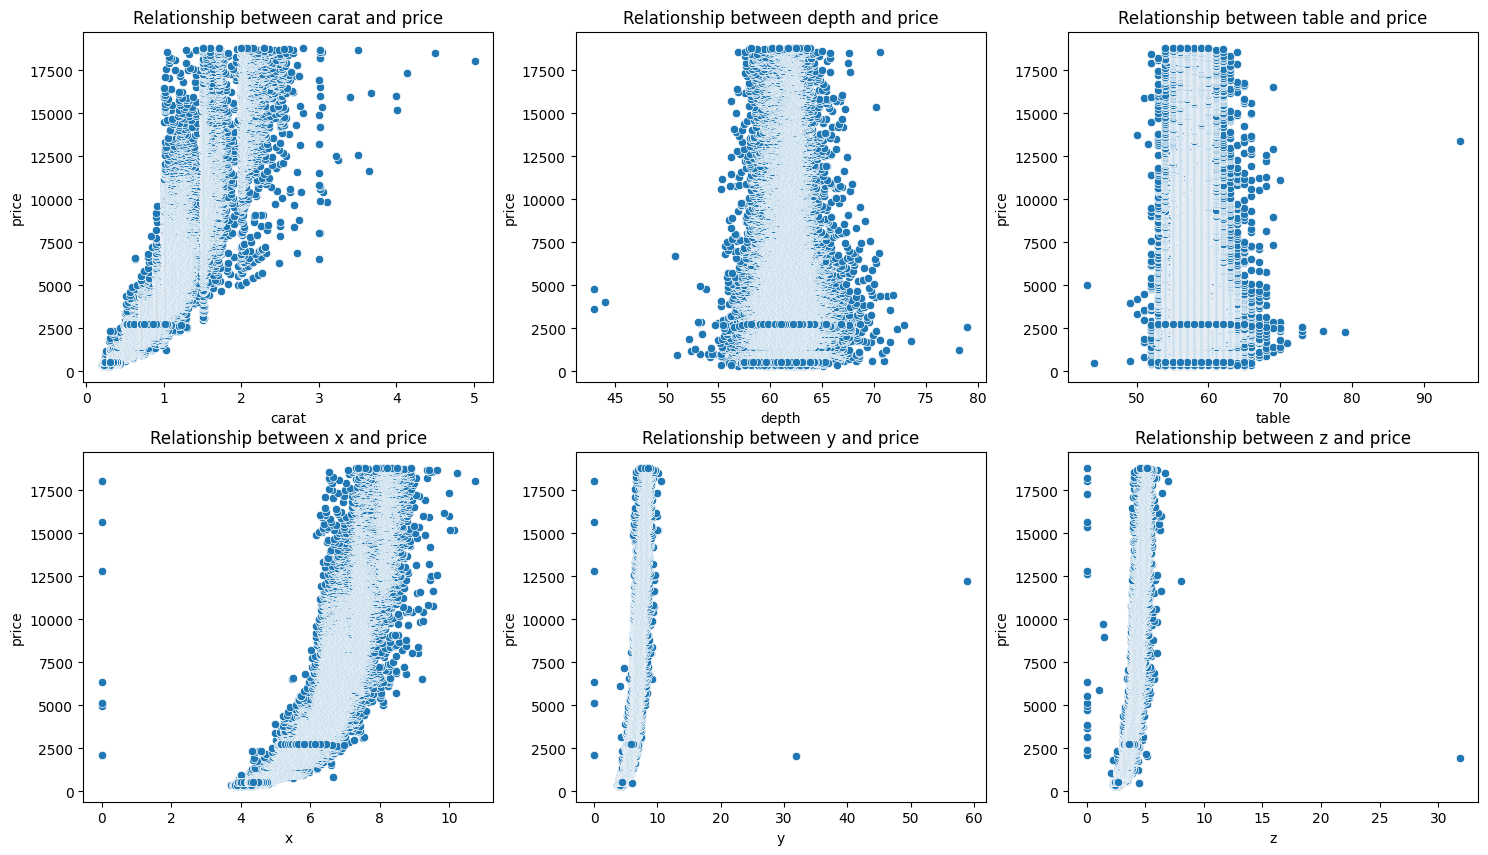

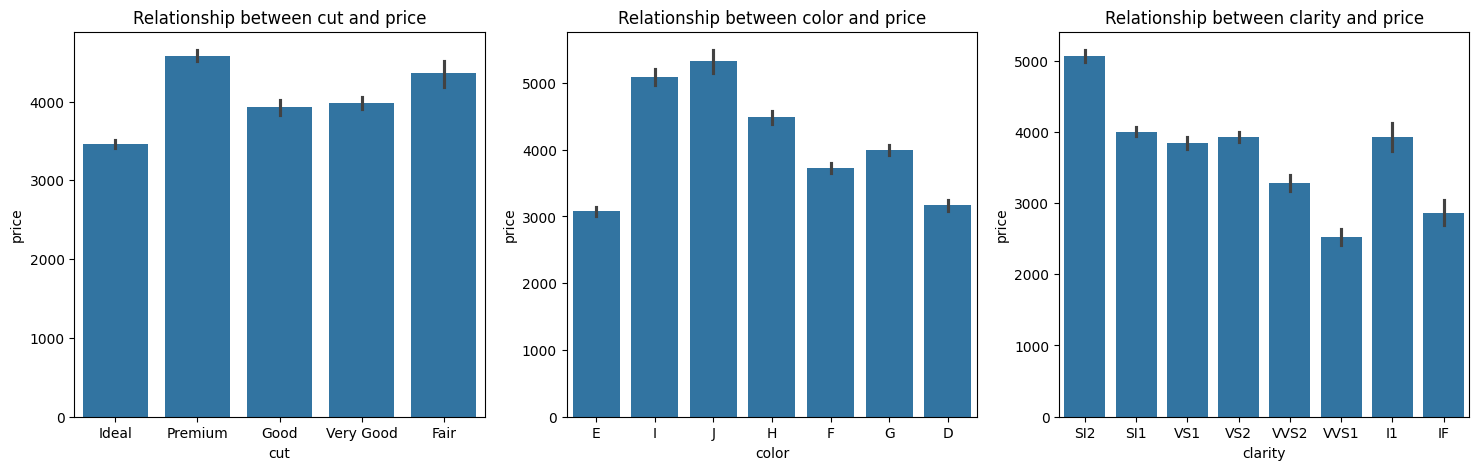

In [ ]:
#visualizing the target variable with respect to numerical features
target_column= "price"
numerical_features= ["carat","depth","table","x","y","z"]
plt.figure(figsize=(18, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=feature, y=target_column, data=diomands_df)  #choosing scatter plot to visualize
    plt.title(f"Relationship between {feature} and {target_column}")
    
plt.show()

#visualizing the target variable with respect to categorical features
categorical_features=["cut","color","clarity"]
plt.figure(figsize=(18, 5))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x=feature, y=target_column, data=diomands_df)  #choosing barplot to visualize
    plt.title(f"Relationship between {feature} and {target_column}" )

plt.show()

**Scatter Plots:** Based on the scatter plots, carat appears to have the strongest positive correlation with price. In contrast, the plots for depth and table show a much weaker relationship with price. The dimensions x, y, and z also show a strong positive correlation with price, similar to carat.

**Bar Plots:**  The plots indicate that higher quality cut, color, and clarity are associated with a higher average price. However, the relationship is not strictly linear for all categories.

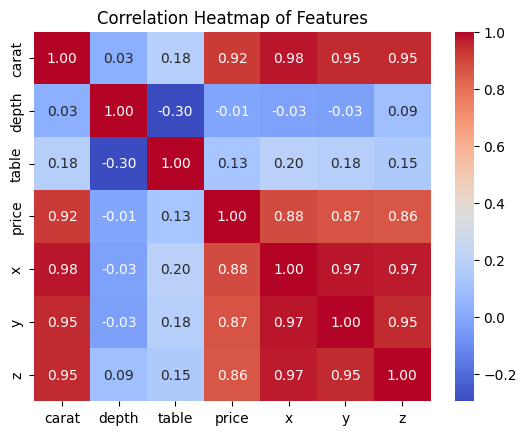

In [95]:
# visualizing the correlation. between the numeric features and price
correlation_matrix = diomands_df.corr(numeric_only=True)
correlation_matrix = correlation_matrix.drop(columns=['Unnamed: 0'], index=['Unnamed: 0']) #dropping the index column

# Plotting the heatmap
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True               
)
plt.title('Correlation Heatmap of Features')
plt.show()

Heatmap shows that **carat, x, y, and z** are highly correlated with the target variable. In contrast, **depth and table** show very little correlation with the target variable.

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [96]:
# implementation here
# calculating the first and third quartile
Q1 = diomands_df["price"].quantile(0.25)
Q3 = diomands_df["price"].quantile(0.75)
IQR = Q3-Q1
# setting the boundaries
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
# detecting the outliers
outliers = diomands_df[(diomands_df["price"] < lower_limit) | (diomands_df["price"] > upper_limit)]
print("Number of outliers:", len(outliers))

Number of outliers: 3540


I choose the ***Interquartile Range (IQR) Method***. This method computes the first (Q1) and third (Q3) quartiles and uses their difference (IQR = Q3 – Q1) to set upper and lower bounds. Any value outside these bounds is considered an outlier. I chose this method because it works well with skewed data and doesn’t assume a normal distribution. Also it is sensitive to extreme values.

## 1.3. Outlier Handling (15 Pts)
Using the selected method, remove the outliers and keep the original dataset as a checkpoint for comparison. After removing the outliers, visualize the updated dataset to show the changes.

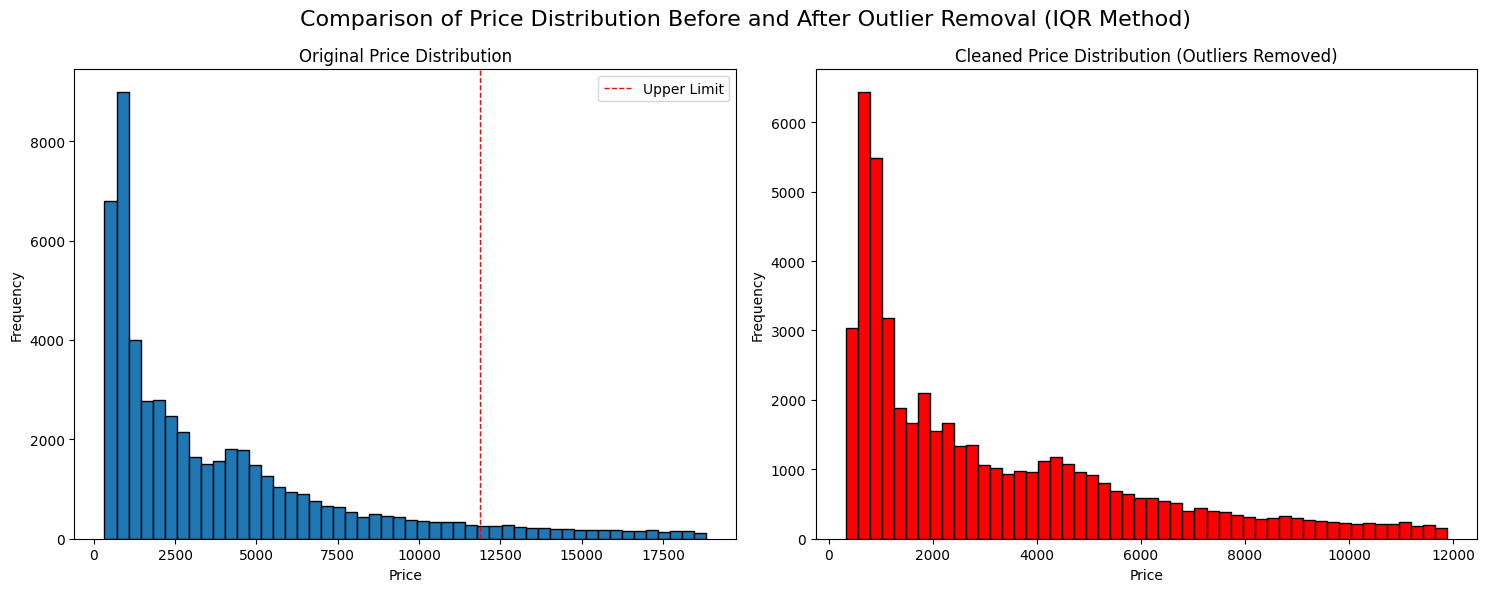

In [97]:
# implementation here
# creating the dataframe with outliers removed 
df_cleaned = diomands_df[(diomands_df["price"] >= lower_limit) & (diomands_df["price"] <= upper_limit)].copy()
fig, axes = plt.subplots(1,2,figsize=(15, 6))
# plot1: original dataset
axes[0].hist(diomands_df["price"], bins=50, edgecolor='black')
axes[0].set_title("Original Price Distribution")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency")
axes[0].axvline(upper_limit, color='red', linestyle='dashed', linewidth=1, label="Upper Limit")
axes[0].legend()
# plot2: dataset without outliers 
axes[1].hist(df_cleaned["price"], bins=50, color="red", edgecolor='black')
axes[1].set_title("Cleaned Price Distribution (Outliers Removed)")
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Frequency")
plt.suptitle('Comparison of Price Distribution Before and After Outlier Removal (IQR Method)', fontsize=16)
plt.tight_layout()
plt.show()

The plot compares the original, right-skewed price distribution with the cleaned distribution, showing a clear reduction in high-value outliers after applying the IQR method.

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [98]:
# implementation here
# defining the map for the ranks of "cut" column
cut_ranks={
    "Fair":0,
    "Good":1,
    "Very Good":2,
    "Premium":3,
    "Ideal":4
}
#encoding the cut column
diomands_df["cut_encoded"]=diomands_df["cut"].map(cut_ranks)

# defining the map for the ranks of "clarity" column
clarity_ranks={
    "I1":0,
    "SI2":1,
    "SI1":2,
    "VS2":3,
    "VS1":4,
    "VVS2":5,
    "VVS1":6,
    "IF":7
}
#encoding the ckarity column
diomands_df["clarity_encoded"]=diomands_df["clarity"].map(clarity_ranks)

# defining map for the ranks of "color" column
color_ranks={
    "J":0,
    "I":1,
    "H":2,
    "G":3,
    "F":4,
    "E":5,
    "D":6
}
# encoding the color column
diomands_df["color_encoded"]=diomands_df["color"].map(color_ranks)
print(diomands_df[["cut","cut_encoded","clarity","clarity_encoded" , "color", "color_encoded"]])


             cut  cut_encoded clarity  clarity_encoded color  color_encoded
0          Ideal            4     SI2                1     E              5
1        Premium            3     SI1                2     E              5
2           Good            1     VS1                4     E              5
3        Premium            3     VS2                3     I              1
4           Good            1     SI2                1     J              0
...          ...          ...     ...              ...   ...            ...
53935      Ideal            4     SI1                2     D              6
53936       Good            1     SI1                2     D              6
53937  Very Good            2     SI1                2     D              6
53938    Premium            3     SI2                1     H              2
53939      Ideal            4     SI2                1     D              6

[53940 rows x 6 columns]


## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split. (8 Pts)

* ***You  cannot use scikit-learn's shuffle.***

In [99]:
# implementation here
# shuffling the dataset using numpy
indices = np.random.permutation(len(diomands_df))
train_size = int(0.7 * len(indices))
# splitting the dataset
train_idx = indices[:train_size]
test_idx  = indices[train_size:]
train_df = diomands_df.iloc[train_idx].reset_index(drop=True)
test_df  = diomands_df.iloc[test_idx].reset_index(drop=True)

# **PART- 2: REGRESSION (50 Pts)**
* Target value: price
* Predictors: The rest

* ***You can use scikit-learn***




## 2.1. Linear Regression (15 Pts)
* For each version of the dataset (original, outlier removal) do the following steps:
    * Split the data into train and test sets
    * Fit a linear regression model to train data.
    * Predict the test set and calculate the MSE value.
* Perform a comparison between the regression performance on the original dataset and the dataset after outlier removal. Analyze and interpret the results, discussing how outlier removal affects model accuracy and generalization.

In [100]:
# implementation here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# for original dataset
# splitting the price column from rest
predictors = diomands_df.drop(["price","color","cut","clarity"], axis=1)
target = diomands_df["price"]
# train-test split
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.3, random_state=42, shuffle=True)
# model fit
model=LinearRegression()
model.fit(predictors_train, target_train)
# predicting
target_p = model.predict(predictors_test)
mse_original=mean_squared_error(target_test, target_p)
print("MSE From the Original Dataset:", mse_original)

MSE From the Original Dataset: 1435878.2282089698


In [101]:
# for the dataset with outlier removed
# splitting the price column from rest
predictors = df_cleaned.drop(["price","color","cut","clarity"], axis=1)
target = df_cleaned["price"]
# train-test split
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.3, random_state=42, shuffle=True)
# model fit
model=LinearRegression()
model.fit(predictors_train, target_train)
# predicting
target_p = model.predict(predictors_test)
mse_cleaned=mean_squared_error(target_test, target_p)
print("MSE From the Cleaned Dataset:", mse_cleaned)

MSE From the Cleaned Dataset: 1172455.8306317364


After applying the IQR method and removing outliers, the MSE decreased from approximately 1.43 million to 1.17 million. This shows that outliers had a negative impact on model performance. Once the extreme values were removed, the linear regression model was able to fit the data more effectively, resulting in lower prediction error.

## 2.2. Cross Validation on Linear Regression (10 Pts)
Apply K-Fold Cross Validation on the Linear Regression model using both the original dataset and the outlier-removed dataset. Based on the cross-validation results (mean and standard deviation of R² and RMSE), explain what the metrics demonstrate about the stability and generalization ability of the model.

In [102]:
# implementation here
from sklearn.model_selection import KFold, cross_val_score
# for the original dataset
predictors = diomands_df.drop(["price","color","cut","clarity"], axis=1)
target = diomands_df["price"]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
r2_orig = cross_val_score(model, predictors, target, cv=kf, scoring="r2" )
mse_orig = cross_val_score(model, predictors, target, cv=kf, scoring="neg_mean_squared_error")
rmse_orig = np.sqrt(-mse_orig)
print("Results for Original Dataset")
print("R² Mean:", r2_orig.mean())
print("R² Std Deviation:", r2_orig.std())
print("RMSE Mean:", rmse_orig.mean())
print("RMSE Std Deviation:", rmse_orig.std())

Results for Original Dataset
R² Mean: 0.9070996661953996
R² Std Deviation: 0.0034244294132837177
RMSE Mean: 1215.6966078191595
RMSE Std Deviation: 24.298225887336816


In [103]:
#for the dataset with outlier removed
predictors = df_cleaned.drop(["price","color","cut","clarity"], axis=1)
target = df_cleaned["price"]
r2_clean = cross_val_score(model, predictors, target, cv=kf, scoring="r2" )
mse_clean = cross_val_score(model, predictors, target, cv=kf, scoring="neg_mean_squared_error")
rmse_clean = np.sqrt(-mse_clean)
print("Results for Cleaned Dataset")
print("R² Mean:", r2_clean.mean())
print("R² Std Deviation:", r2_clean.std())
print("RMSE Mean:", rmse_clean.mean())
print("RMSE Std Deviation:", rmse_clean.std())

Results for Cleaned Dataset
R² Mean: 0.8415870018813871
R² Std Deviation: 0.004464255536072431
RMSE Mean: 1100.0785365132035
RMSE Std Deviation: 15.072119136252324


**Model Stability:** Lower standard deviation indicates higher stability. The **cleaned dataset** results in a lower standard deviation for RMSE. This demonstrates that the model trained on the cleaned data is more stable in its prediction error.

**Generalization Ability:** This refers to the model's ability to perform well on new, unseen data. Indicated by R2 and RMSE. The **cleaned dataset** has a significantly lower RMSE. A lower RMSE means the model's predictions are closer to the actual values on the validation folds.

## 2.3. kNN Regression (15 Pts)
* For each version of the dataset (original, outlier-removed), execute the following steps:
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-10, then fit kNN regression model to train data.
    * Predict the test set and calculate the MSE value for each k.
    * Plot the MSE vs k curve to decide on the optimal k.
    * Report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?
* After identifying the dataset and k value that gives the best performance, apply feature scaling (e.g., StandardScaler) to that dataset only. Repeat the kNN regression steps with scaled data and analyze how scaling changes the results compared to the non-scaled version.

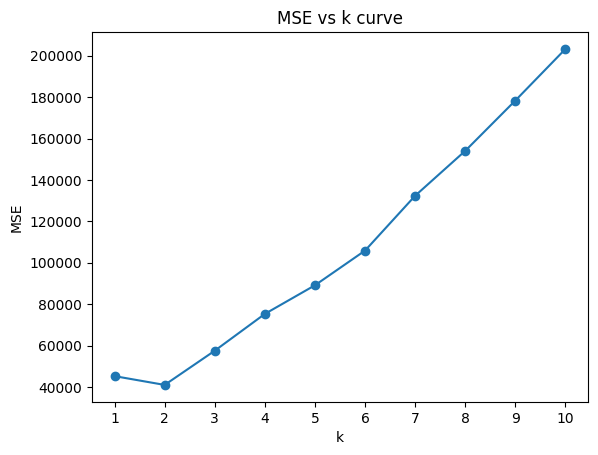

Results for Original Dataset
MSE values: [45237.97948337659, 40994.87608144852, 57517.69628805669, 75298.32069197256, 89125.69370411568, 105881.80349908679, 132367.74193926738, 154060.83779334291, 178356.19795047387, 203266.7699073044]
Optimal k: 2
Optimal r2: 0.9973714431649247


In [ ]:
# implementation here
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

x = diomands_df.drop(["price","color","cut","clarity"], axis=1)
y = diomands_df["price"]
# splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, shuffle=True)
mse_values = []
r2_values = []
# calculating knn for range(1, 11)
for k in range(1, 11):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    mse_values.append(mse)
    r2_values.append(r2)

# plotting MSE vs k curve
plt.plot(range(1,11), mse_values, marker="o")
plt.title("MSE vs k curve")
plt.xlabel("k")
plt.ylabel("MSE")
plt.xticks(range(1,11))
plt.show()

#finding optimal k and optimal r2 values
optimal_k = mse_values.index(min(mse_values)) + 1
optimal_r2 = r2_values[optimal_k-1]

print("Results for Original Dataset")
print("MSE values:", mse_values)
print("Optimal k:", optimal_k)
print("Optimal r2:",optimal_r2)

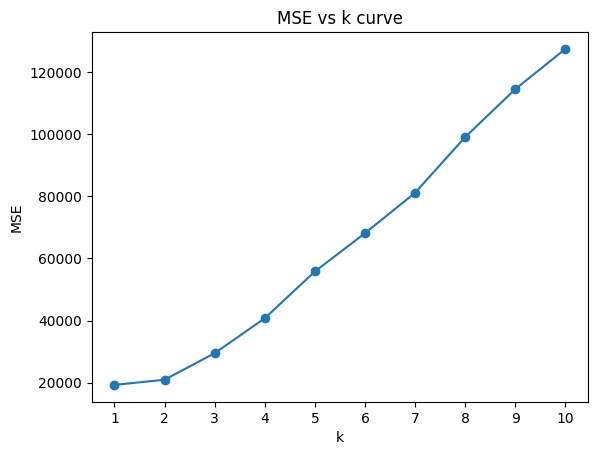

Results for Cleaned Dataset
MSE values: [19229.00099206349, 20900.74128637566, 29460.331238977073, 40724.680890376985, 55806.937473544975, 68143.3901473398, 81180.95976136487, 99137.06729497355, 114593.45700078386, 127576.1030978836]
Optimal k: 1
Optimal r2: 0.9974110266963695


In [ ]:
x_clean = df_cleaned.drop(["price","color","cut","clarity"], axis=1)
y_clean = df_cleaned["price"]
# splitting the dataset
x_clean_train, x_clean_test, y_clean_train, y_clean_test = train_test_split(
    x_clean, y_clean, test_size=0.3, random_state=42, shuffle=True)
mse_clean_values = []
r2_clean_values = []
# calculating knn for range(1, 11)
for k in range(1, 11):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_clean_train, y_clean_train)
    prediction_clean = model.predict(x_clean_test)
    mse = mean_squared_error(y_clean_test, prediction_clean)
    r2 = r2_score(y_clean_test, prediction_clean)
    mse_clean_values.append(mse)
    r2_clean_values.append(r2)

# plotting MSE vs k curve
plt.plot(range(1,11), mse_clean_values, marker="o")
plt.title("MSE vs k curve")
plt.xlabel("k")
plt.ylabel("MSE")
plt.xticks(range(1,11))
plt.show()

#finding optimal k and optimal r2 values
optimal_k = mse_clean_values.index(min(mse_clean_values)) + 1
optimal_r2_clean = r2_clean_values[optimal_k-1]

print("Results for Cleaned Dataset")
print("MSE values:", mse_clean_values)
print("Optimal k:", optimal_k)
print("Optimal r2:",optimal_r2_clean)

***The outlier-removed dataset*** produced lower MSE values across k, and the lowest at k=1, meaning the model fits more consistently. Cleaned Dataset gave better results because kNN is sensitive to outliers and removing outliers allows KNN to find more meaningful neighbors, improving prediction.

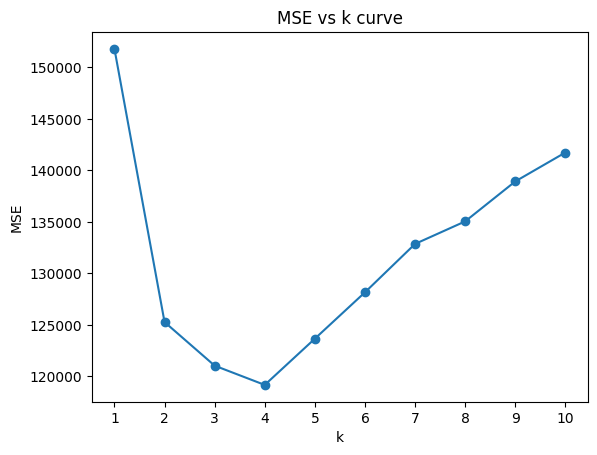

Results for Scaled Dataset
MSE values: [151784.6296957672, 125278.3249834656, 121045.99801587302, 119177.9306506283, 123664.5201931217, 128163.85987838036, 132860.86303854873, 135047.25406229333, 138925.29461509569, 141731.41045039683]
Optimal k: 4
Optimal r2: 0.9839540035926069


In [ ]:
x_clean_train, x_clean_test, y_clean_train, y_clean_test = train_test_split(
    x_clean, y_clean, test_size=0.3, random_state=42, shuffle=True)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_clean_train)
x_test_scaled = scaler.transform(x_clean_test)
mse_scaled_values = []
r2_scaled_values = []
# calculating knn for range(1, 11)
for k in range(1, 11):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train_scaled, y_clean_train)
    prediction_scaled = model.predict(x_test_scaled)
    mse = mean_squared_error(y_clean_test, prediction_scaled)
    r2 = r2_score(y_clean_test, prediction_scaled)
    mse_scaled_values.append(mse)
    r2_scaled_values.append(r2)

# plotting MSE vs k curve
plt.plot(range(1,11), mse_scaled_values, marker="o")
plt.title("MSE vs k curve")
plt.xlabel("k")
plt.ylabel("MSE")
plt.xticks(range(1,11))
plt.show()

#finding optimal k and optimal r2 values
optimal_k = mse_scaled_values.index(min(mse_scaled_values)) + 1
optimal_r2_scaled = r2_scaled_values[optimal_k-1]

print("Results for Scaled Dataset")
print("MSE values:", mse_scaled_values)
print("Optimal k:", optimal_k)
print("Optimal r2:",optimal_r2_scaled)

Feature scaling negatively affected performance, increasing the MSE and reducing R². Scaling altered the relative distances between observations, leading to less accurate neighbor selection. Overall, cleaning improved kNN performance, while scaling reduced its effectiveness for this dataset.

## 2.4. Compare the Regression Methods (10 Pts)

* Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions.

* Discuss the strengths and limitations of each model based on your results

In [107]:
# implementation here

# linear regression results
lr_original_mse = mse_original
lr_cleaned_mse = mse_cleaned

# kNN results
knn_original_mse = min(mse_values)  # Find the min value from mse_values (Original Dataset)
knn_original_r2 = optimal_r2

knn_cleaned_mse = min(mse_clean_values)   # Find the min value from mse_clean_values (Cleaned Dataset)
knn_cleaned_r2 = optimal_r2_clean

knn_scaled_mse = min(mse_scaled_values)     # Find the min value from mse_scaled_values (Scaled Dataset)
knn_scaled_r2 = optimal_r2_scaled

# creating a comparison dataframe
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression (Original)","Linear Regression (Cleaned)","kNN (Original)","kNN (Cleaned)","kNN (Scaled)"],
    "MSE": [lr_original_mse,lr_cleaned_mse,knn_original_mse,knn_cleaned_mse,knn_scaled_mse],
    "R2": [None,None,knn_original_r2,knn_cleaned_r2, knn_scaled_r2 ]
})
comparison_df = comparison_df.sort_values(by='MSE', ascending=True).reset_index(drop=True)
print(comparison_df,"\n")

# finding best model
best_result = comparison_df.iloc[0]
print("Best Performer Model")
print(f"Model: {best_result['Model']}")
print(f"MSE: {best_result['MSE']}")
print(f"R-squared: {best_result['R2']}")

                          Model           MSE        R2
0                 kNN (Cleaned)  1.922900e+04  0.997411
1                kNN (Original)  4.099488e+04  0.997371
2                  kNN (Scaled)  1.191779e+05  0.983954
3   Linear Regression (Cleaned)  1.172456e+06       NaN
4  Linear Regression (Original)  1.435878e+06       NaN 

Best Performer Model
Model: kNN (Cleaned)
MSE: 19229.00099206349
R-squared: 0.9974110266963695


**LINEAR VS KNN:** kNN Regression achieved the best MSE and the highest R2, making it the best model. The relationship between the price of diamonds and other features are non-linear. Linear Regression, failed to capture this complexity, resulting larger MSE results.

**IMPACT OF DATA CLEANING:** The cleaned dataset where outliers were removed provided the best results for the kNN model. This shows that the dataset contained outliers that negatively affected model performance. Removing these extreme points allowed kNN model to show more accurate results. For Linear Regression data cleaning resulted in a positive improvement, but the model's performance remained worse than kNN.



**KNN**

**Strengths:** effective on non-linear relationships, highly accurate when trained on cleaned data 

**Limitations:** Sensitive to feature scaling and outliers 


**LINEAR REGRESSION**

**Strengths:** Simple and computationally efficient, easy to interpret

**Limitations:** performs poorly on complex, non-linear datasets


**Conclusion:** Overall, kNN regression using the cleaned dataset is the best-performing model in this study. The results highlight the importance of data preprocessing.

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw3.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.